In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [191]:
# 1: read in the tree
from Bio import Phylo
tree = Phylo.read('superfam_all_bacteria_and_archaea_ncbi_taxid.newick.txt', 'newick')

In [ ]:
# DO NOT RUN - ~2hrs
# get the species names for each node;  get entire lineage names
# DO NOT Re-RUN - dictionaries saved below

sci_name_dict = dict()
lineage_dict = dict()

from Bio import Entrez

for leaf in tree.get_terminals(): 
    print(leaf.name)
    Entrez.email = 'aurovsky@cs.stonybrook.edu'  # Put your email here
    handle = Entrez.efetch('taxonomy', id=leaf.name, rettype='xml')
    response = Entrez.read(handle)

    for entry in response:
        sci_name = entry.get('ScientificName')
        lineage_taxa = entry.get('Lineage').split(';')
        sci_name_dict[leaf.name] = sci_name
        lineage_dict[leaf.name] = lineage_taxa

import pickle
with open('superfam_all_bacteria_and_archaea_sci_name_dict.txt', 'wb') as handle:
    pickle.dump(sci_name_dict, handle)
with open('superfam_all_bacteria_and_archaea_lineage_dict.txt', 'wb') as handle:
    pickle.dump(lineage_dict, handle)

In [192]:
# 2: READ in the name mapping dictionaries
import pickle
with open('superfam_all_bacteria_and_archaea_sci_name_dict.txt', 'rb') as handle:
    sci_name_dict = pickle.loads(handle.read())
with open('superfam_all_bacteria_and_archaea_lineage_dict.txt', 'rb') as handle:
    lineage_dict = pickle.loads(handle.read())

In [193]:
# 3: give names to internal nodes: numbers from 0, as long as they are not already used for leaf node tax ids
count_leaf = 0
count_inner = 0
name_counter = 0

leaf_list = []
for leaf in tree.get_terminals():
    leaf_list.append(leaf.name)
    
for node in tree.find_clades():
    if (node.is_terminal()):
        count_leaf += 1
    else:
        while(str(name_counter) in leaf_list):
            name_counter += 1
        node.name = str(name_counter)        
        name_counter += 1
        count_inner += 1
#print(count_leaf) 1273
#print(count_inner) 1272

In [22]:
# 4a: write out the edgelist file: connections between all the nodes, both directions for deepwalk
f = open('superfam_all_bacteria_and_archaea_edge_list','w')
for node in tree.find_clades():
    if ( not node.is_terminal()):
        #print("node ", node.name)
        for i in node.clades:
            #print("child ", i.name)
            f.write(node.name + " " + i.name + "\n")
            f.write(i.name + " " + node.name + "\n")
f.close()

In [111]:
# 4b: write out the edgelist file: connections between all the nodes, only from child to parent in tsv format, poincare
f = open('superfam_all_bacteria_and_archaea_egdes_to_parents.tsv','w')
for node in tree.find_clades():
    if ( not node.is_terminal()):
        #print("node ", node.name)
        for i in node.clades:
            #print("child ", i.name)
            f.write(i.name + "\t" + node.name + "\n")
f.close()

In [190]:
# DO NOT Re-RUN - saved into a file (unless updating) ~2hrs
# pairwise distances between all nodes in a tree, including all the internal nodes

count = 0
all_tree_pairwise_distances_dict = dict()
for node in tree.find_clades():
    count += 1
    all_tree_pairwise_distances_dict[node.name] = dict()
    for node2 in tree.find_clades():
        if (node.name != node2.name):
            all_tree_pairwise_distances_dict[node.name][node2.name] = tree.distance(node, node2)            
    print("done processing ", str(count), " , ", node.name)

import pickle
with open('superfam_all_bacteria_and_archaea_all_tree_pairwise_distances.txt', 'wb') as handle:
    pickle.dump(all_tree_pairwise_distances_dict, handle)

done processing  1  ,  None
done processing  2  ,  None
done processing  3  ,  None
done processing  4  ,  None
done processing  5  ,  None
done processing  6  ,  None
done processing  7  ,  None
done processing  8  ,  None
done processing  9  ,  None
done processing  10  ,  None
done processing  11  ,  None
done processing  12  ,  None
done processing  13  ,  None


KeyboardInterrupt: 

In [201]:
depths_dict = tree.depths(unit_branch_lengths=True)


In [207]:
# DO NOT Re-RUN - saved into a file (unless updating) ~2hrs
# pairwise links between all nodes in a tree, including all the internal nodes

count = 0
all_tree_pairwise_links_dict = dict()
for node in tree.find_clades():
    count += 1
    all_tree_pairwise_links_dict[node.name] = dict()
    for node2 in tree.find_clades():
        if (node.name != node2.name):
            mrca = tree.common_ancestor(node, node2)
            dist = (depths_dict[node] - depths_dict[mrca]) + (depths_dict[node2] - depths_dict[mrca])
            all_tree_pairwise_links_dict[node.name][node2.name] = dist
            #print(node2.name + " " + str(dist))
    #print("done processing ", str(count), " , ", node.name)
    if (count > 1):
        break

import pickle
with open('superfam_all_bacteria_and_archaea_all_tree_pairwise_links.txt', 'wb') as handle:
    pickle.dump(all_tree_pairwise_links_dict, handle)

1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
565575 15
505682 15
15 14
16 15
17 16
18 17
19 18
20 19
21 20
22 21
23 22
24 23
1111676 24
859194 24
25 23
708248 24
1197325 24
907287 22
572263 21
1129369 20
272635 19
26 18
27 19
28 20
29 21
30 22
767465 23
347257 23
31 22
243272 23
347256 23
943945 21
512564 20
262723 19
267748 17
32 16
33 17
34 18
1112856 19
243273 19
708616 18
272633 17
35 15
36 16
37 17
866629 18
862259 18
340047 17
743965 16
265311 13
38 12
37692 13
39 13
322098 14
262768 14
40 11
445932 12
471821 12
41 10
42 11
43 12
651822 13
572547 13
44 12
45 13
580340 14
525903 14
891968 13
46 11
47 12
48 13
49 14
50 15
660470 16
521045 16
51 15
443254 16
52 16
53 17
771875 18
381764 18
54 17
391009 18
484019 18
55 14
416591 15
56 15
57 16
58 17
59 18
126740 19
60 19
590168 20
390874 20
243274 18
309803 17
688269 16
403833 13
61 12
62 13
515635 14
309799 14
511051 13
63 9
64 10
572544 11
190304 11
65 10
66 11
519441 12
523794 12
526218 11
67 8
68 9
69 10
70 1

537 13
538 14
539 15
540 16
541 17
651143 18
504472 18
761193 17
471854 16
649349 15
542 14
880071 15
269798 15
543 12
544 13
545 14
546 15
331104 16
1316444 16
547 15
595499 16
641892 16
548 14
755732 15
926562 15
549 13
550 14
551 15
552 16
553 17
554 18
746697 19
216432 19
983548 18
555 17
983544 18
313598 18
556 16
655815 17
411154 17
557 15
558 16
313603 17
559 17
313596 18
886377 18
560 16
63186 17
561 17
688270 18
867900 18
562 14
563 15
564 16
565 17
865938 18
693978 18
531844 17
566 16
867902 17
567 17
860228 18
521097 18
568 15
569 16
570 17
1094466 18
571 18
402612 19
1041826 19
1034807 17
376686 16
572 11
573 12
574 13
700598 14
485918 14
575 13
929556 14
576 14
577 15
762903 16
485917 16
743722 15
578 12
760192 13
984262 13
579 10
580 11
581 12
582 13
264731 14
583 14
584 15
553174 16
767031 16
246198 15
585 13
586 14
511995 15
1400053 15
679935 14
587 12
588 13
589 14
590 15
667015 16
820 16
435590 15
226186 14
591 13
693979 14
295405 14
592 11
593 12
594 13
595 14
596 15

525919 14
334413 14
127 12
128 13
129 14
130 15
131 16
646529 17
768706 17
132 16
756499 17
138119 17
133 15
134 16
1147129 17
1131462 17
645991 16
135 14
136 15
137 16
485916 17
760568 17
138 16
139 17
868595 18
349161 18
696281 17
140 15
141 16
477974 17
370438 17
635013 16
142 13
143 14
643648 15
335541 15
498761 14
144 10
145 11
146 12
147 13
148 14
149 15
150 16
858215 17
580327 17
151 16
152 17
153 18
154 19
155 20
608506 21
632518 21
156 20
632516 21
632335 21
157 19
632348 20
521460 20
632292 18
351627 17
555079 15
697281 14
158 13
159 14
160 15
161 16
162 17
163 18
164 19
340099 20
509193 20
399726 19
165 18
583358 19
580331 19
697303 17
273068 16
1209989 15
166 14
246194 15
167 15
264732 16
429009 16
168 12
747365 13
309798 13
169 11
170 12
171 13
373903 14
172 14
656519 15
572479 15
574087 13
457570 12
173 8
174 9
175 10
176 11
177 12
945021 13
1090974 13
178 12
179 13
768486 14
1155766 14
180 13
657310 14
936153 14
181 11
182 12
183 13
184 14
185 15
186 16
187 17
979982 18


749 14
357348 15
320388 15
271848 14
750 13
882378 14
751 14
999541 15
626418 15
752 12
753 13
754 14
331272 15
395019 15
339670 14
269482 13
755 9
756 10
757 11
758 12
759 13
760 14
1008459 15
937774 15
1036672 14
1007105 13
761 12
762 13
763 14
764 15
257313 16
257311 16
257310 15
360910 14
340100 13
765 11
762376 12
85698 12
766 10
767 11
768 12
769 13
871271 14
204773 14
375286 13
757424 12
1005048 11
770 8
771 9
772 10
773 11
365046 12
774 12
296591 13
365044 13
338969 11
775 10
776 11
777 12
778 13
391735 14
596154 14
779 13
780 14
781 15
535289 16
232721 16
358220 15
782 14
397945 15
643561 15
783 12
784 13
742013 14
398578 14
688245 13
543728 11
785 9
786 10
420662 11
787 11
426114 12
75379 12
788 10
983917 11
395495 11
789 6
790 7
791 8
792 9
793 10
794 11
795 12
796 13
743299 14
380394 14
990288 13
797 12
798 13
799 14
754476 15
385025 15
800 14
717773 15
317025 15
801 13
802 14
803 15
804 16
805 17
401614 18
676032 18
418136 17
1163389 16
484022 15
573569 14
806 11
807 12
80

In [75]:
# 5: read all distances from the file in
import pickle
with open('superfam_all_bacteria_and_archaea_all_tree_pairwise_distances.txt', 'rb') as handle:
    all_tree_pairwise_distances_dict = pickle.loads(handle.read())
print("loaded all tree pairwise distances")

loaded all tree pairwise distances


In [77]:
# 6a: define comparison pairs of edges and order to use for all metrics - all node pairs
comparison_all_node_pairs_dict = dict()
counter = 0
for node1 in tree.find_clades():
    for node2 in tree.find_clades():
        if ((node1.name != node2.name) and ((node1.name, node2.name) not in comparison_all_node_pairs_dict) \
            and ((node2.name, node1.name) not in comparison_all_node_pairs_dict)):
            comparison_all_node_pairs_dict[(node1.name, node2.name)] = 1
    #print("finished for node ", str(counter))
    counter += 1

comparison_all_node_pairs_list = list(comparison_all_node_pairs_dict.keys())
print(len(comparison_all_node_pairs_list))


finished for node  0
finished for node  1
finished for node  2
finished for node  3
finished for node  4
finished for node  5
finished for node  6
finished for node  7
finished for node  8
finished for node  9
finished for node  10
finished for node  11
finished for node  12
finished for node  13
finished for node  14
finished for node  15
finished for node  16
finished for node  17
finished for node  18
finished for node  19
finished for node  20
finished for node  21
finished for node  22
finished for node  23
finished for node  24
finished for node  25
finished for node  26
finished for node  27
finished for node  28
finished for node  29
finished for node  30
finished for node  31
finished for node  32
finished for node  33
finished for node  34
finished for node  35
finished for node  36
finished for node  37
finished for node  38
finished for node  39
finished for node  40
finished for node  41
finished for node  42
finished for node  43
finished for node  44
finished for node  4

finished for node  363
finished for node  364
finished for node  365
finished for node  366
finished for node  367
finished for node  368
finished for node  369
finished for node  370
finished for node  371
finished for node  372
finished for node  373
finished for node  374
finished for node  375
finished for node  376
finished for node  377
finished for node  378
finished for node  379
finished for node  380
finished for node  381
finished for node  382
finished for node  383
finished for node  384
finished for node  385
finished for node  386
finished for node  387
finished for node  388
finished for node  389
finished for node  390
finished for node  391
finished for node  392
finished for node  393
finished for node  394
finished for node  395
finished for node  396
finished for node  397
finished for node  398
finished for node  399
finished for node  400
finished for node  401
finished for node  402
finished for node  403
finished for node  404
finished for node  405
finished fo

finished for node  726
finished for node  727
finished for node  728
finished for node  729
finished for node  730
finished for node  731
finished for node  732
finished for node  733
finished for node  734
finished for node  735
finished for node  736
finished for node  737
finished for node  738
finished for node  739
finished for node  740
finished for node  741
finished for node  742
finished for node  743
finished for node  744
finished for node  745
finished for node  746
finished for node  747
finished for node  748
finished for node  749
finished for node  750
finished for node  751
finished for node  752
finished for node  753
finished for node  754
finished for node  755
finished for node  756
finished for node  757
finished for node  758
finished for node  759
finished for node  760
finished for node  761
finished for node  762
finished for node  763
finished for node  764
finished for node  765
finished for node  766
finished for node  767
finished for node  768
finished fo

finished for node  1088
finished for node  1089
finished for node  1090
finished for node  1091
finished for node  1092
finished for node  1093
finished for node  1094
finished for node  1095
finished for node  1096
finished for node  1097
finished for node  1098
finished for node  1099
finished for node  1100
finished for node  1101
finished for node  1102
finished for node  1103
finished for node  1104
finished for node  1105
finished for node  1106
finished for node  1107
finished for node  1108
finished for node  1109
finished for node  1110
finished for node  1111
finished for node  1112
finished for node  1113
finished for node  1114
finished for node  1115
finished for node  1116
finished for node  1117
finished for node  1118
finished for node  1119
finished for node  1120
finished for node  1121
finished for node  1122
finished for node  1123
finished for node  1124
finished for node  1125
finished for node  1126
finished for node  1127
finished for node  1128
finished for nod

finished for node  1431
finished for node  1432
finished for node  1433
finished for node  1434
finished for node  1435
finished for node  1436
finished for node  1437
finished for node  1438
finished for node  1439
finished for node  1440
finished for node  1441
finished for node  1442
finished for node  1443
finished for node  1444
finished for node  1445
finished for node  1446
finished for node  1447
finished for node  1448
finished for node  1449
finished for node  1450
finished for node  1451
finished for node  1452
finished for node  1453
finished for node  1454
finished for node  1455
finished for node  1456
finished for node  1457
finished for node  1458
finished for node  1459
finished for node  1460
finished for node  1461
finished for node  1462
finished for node  1463
finished for node  1464
finished for node  1465
finished for node  1466
finished for node  1467
finished for node  1468
finished for node  1469
finished for node  1470
finished for node  1471
finished for nod

finished for node  1774
finished for node  1775
finished for node  1776
finished for node  1777
finished for node  1778
finished for node  1779
finished for node  1780
finished for node  1781
finished for node  1782
finished for node  1783
finished for node  1784
finished for node  1785
finished for node  1786
finished for node  1787
finished for node  1788
finished for node  1789
finished for node  1790
finished for node  1791
finished for node  1792
finished for node  1793
finished for node  1794
finished for node  1795
finished for node  1796
finished for node  1797
finished for node  1798
finished for node  1799
finished for node  1800
finished for node  1801
finished for node  1802
finished for node  1803
finished for node  1804
finished for node  1805
finished for node  1806
finished for node  1807
finished for node  1808
finished for node  1809
finished for node  1810
finished for node  1811
finished for node  1812
finished for node  1813
finished for node  1814
finished for nod

finished for node  2126
finished for node  2127
finished for node  2128
finished for node  2129
finished for node  2130
finished for node  2131
finished for node  2132
finished for node  2133
finished for node  2134
finished for node  2135
finished for node  2136
finished for node  2137
finished for node  2138
finished for node  2139
finished for node  2140
finished for node  2141
finished for node  2142
finished for node  2143
finished for node  2144
finished for node  2145
finished for node  2146
finished for node  2147
finished for node  2148
finished for node  2149
finished for node  2150
finished for node  2151
finished for node  2152
finished for node  2153
finished for node  2154
finished for node  2155
finished for node  2156
finished for node  2157
finished for node  2158
finished for node  2159
finished for node  2160
finished for node  2161
finished for node  2162
finished for node  2163
finished for node  2164
finished for node  2165
finished for node  2166
finished for nod

finished for node  2468
finished for node  2469
finished for node  2470
finished for node  2471
finished for node  2472
finished for node  2473
finished for node  2474
finished for node  2475
finished for node  2476
finished for node  2477
finished for node  2478
finished for node  2479
finished for node  2480
finished for node  2481
finished for node  2482
finished for node  2483
finished for node  2484
finished for node  2485
finished for node  2486
finished for node  2487
finished for node  2488
finished for node  2489
finished for node  2490
finished for node  2491
finished for node  2492
finished for node  2493
finished for node  2494
finished for node  2495
finished for node  2496
finished for node  2497
finished for node  2498
finished for node  2499
finished for node  2500
finished for node  2501
finished for node  2502
finished for node  2503
finished for node  2504
finished for node  2505
finished for node  2506
finished for node  2507
finished for node  2508
finished for nod

In [78]:
# 6b: define comparison pairs of edges and order to use for all metrics - just tree edges
def get_parent(tree, child_clade):
    node_path = tree.get_path(child_clade)
    if (len(node_path) >=2 ):
        return node_path[-2]
    else:
        return None
    
comparison_tree_edges_dict = dict()    
for myclade in tree.find_clades():
    parent = get_parent(tree, myclade)
    if (parent != None):
        comparison_tree_edges_dict[(myclade.name, parent.name)] = 1

comparison_tree_edges_list = list(comparison_tree_edges_dict.keys())
print(len(comparison_tree_edges_list))

2542


In [82]:
# 6c: define comparison pairs of edges and order to use for all metrics - random n edges, where n is size(tree edges)
from random import randint

n = len(comparison_tree_edges_list)
comparison_n_random_pairs_dict = dict()    

counter = 0
while(counter < n):
    idx = randint(0, len(comparison_all_node_pairs_list))
    if (comparison_all_node_pairs_list[idx] not in comparison_n_random_pairs_dict):
        comparison_n_random_pairs_dict[comparison_all_node_pairs_list[idx]] = 1
        counter += 1
        
comparison_n_random_pairs_list = list(comparison_n_random_pairs_dict.keys())
print(len(comparison_n_random_pairs_list))


2542


In [91]:
# 6d: define comparison pairs of edges and order to use for all metrics - all node pairs link 2 distance away

def get_link_2_neighbors(tree, my_clade):
    neighbors = []
    # first get the grandparent and the sibling of my_clade
    node_path = tree.get_path(my_clade)
    if (len(node_path) >=3 ):
        neighbors.append(node_path[-3]) # grandparent
    if (len(node_path) >=2 ):
        parent = node_path[-2]
        for child in parent:
            if (child.name != my_clade.name):
                neighbors.append(child) # sibling
    # now get the grandchildren
    for child in my_clade:
        for grandchild in child:
            neighbors.append(grandchild)
    return neighbors

comparison_link_2_neighbor_pairs_dict = dict()
for myclade in tree.find_clades():
    link_2_neighbors = get_link_2_neighbors(tree, myclade)
    added = 0
    for neighbor in link_2_neighbors:
        if ((myclade.name != neighbor.name) and ((myclade.name, neighbor.name) not in comparison_link_2_neighbor_pairs_dict) \
            and ((neighbor.name, myclade.name) not in comparison_link_2_neighbor_pairs_dict)):
            comparison_link_2_neighbor_pairs_dict[(myclade.name, neighbor.name)] = 1
            added += 1
    #print(myclade.name + " " + str(added))   

comparison_link_2_neighbor_pairs_list = list(comparison_link_2_neighbor_pairs_dict.keys())
print(len(comparison_link_2_neighbor_pairs_list))

3813


In [39]:
# 7: get the list of phylogenetic distances for the comparison order
phylogenetic_distance_all_node_pairs_list = []
for (name1, name2) in comparison_all_node_pairs_list:
    phylogenetic_distance_all_node_pairs_list.append(all_tree_pairwise_distances_dict[name1][name2])

In [157]:
# 8: generate random embeddings

import numpy as np

random_embeddings = dict()
for d in [2, 5, 10, 20]:
    random_embeddings[d] = dict()
    for node in tree.find_clades():
        random_embeddings[d][node.name] = np.random.uniform(-1,1,d)

In [139]:
print("bla")

bla


In [159]:
# 9: get lists of euclidean distances for random embeddings for comparsion order - do for all node pairs

random_embeddings_euclidean_distance_dict = dict()

for d in [2, 5, 10, 20]:
    random_embeddings_euclidean_distance_dict[d] = []
    for (name1, name2) in comparison_all_node_pairs_list:
        one = np.array(random_embeddings[d][name1])   
        two = np.array(random_embeddings[d][name2])
        eval_distance = np.linalg.norm(one-two)
        #eval_distance = 2 * (1 - np.dot(one, two)/( np.linalg.norm(one) * np.linalg.norm(two)))
        random_embeddings_euclidean_distance_dict[d].append(eval_distance)

In [165]:
# 10a:  run deepwalk for d=2, 5, 10, 20
# https://github.com/phanein/deepwalk
# takes about 20 minutes with the settings below
#time deepwalk --input ../phylogeny_embeddings/superfam_all_bacteria_and_archaea_edge_list --output super
#fam_all_bacteria_and_archaea_deepwalk_embeddings_10d --workers 20 --representation-size 10&

# the output files are of the form: superfam_all_bacteria_and_archaea_deepwalk_embeddings_*d

deepwalk_embeddings_euclidean_distance_dict = dict()
import csv
# extract the output of all the files, and compute the euclidean distances of all the pairs
for d in [2, 5, 10, 20]:
    fname = "superfam_all_bacteria_and_archaea_deepwalk_embeddings_" + str(d) + "d"
    csvfile = open(fname)
    reader = csv.reader(csvfile, delimiter=' ')
    next(reader)
    deepwalk_embeddings = dict()
    for row in reader:
        deepwalk_embeddings[row[0]] = list(map(float, row[1:]))

    deepwalk_embeddings_euclidean_distance_dict[d] = []
    for (name1, name2) in comparison_all_node_pairs_list:
        one = np.array(deepwalk_embeddings[name1])
        two = np.array(deepwalk_embeddings[name2])
        eval_distance = np.linalg.norm(one-two)
        #eval_distance = 2 * (1 - np.dot(one, two)/( np.linalg.norm(one) * np.linalg.norm(two)))
        deepwalk_embeddings_euclidean_distance_dict[d].append(eval_distance)  

In [151]:
# 10b: run poincare for d=2, 5, 10, 20
# github:  https://github.com/TatsuyaShirakawa/poincare-embedding
# paper: https://arxiv.org/pdf/1705.08039.pdf
# ./poincare_embedding ./superfam_all_bacteria_and_archaea_egdes_to_parents.tsv 
#../../phylogeny_embeddings/superfam_all_bacteria_and_archaea_poincare_embeddings_2d.tsv 
# -d 2 -t 8 -e 1000 -l 0.1 -L 0.0001 -n 20 -s 0

# the output files are of the form superfam_all_bacteria_and_archaea_poincare_embeddings_*d.tsv 
poincare_embeddings_poincare_distance_dict = dict()
import csv
import math
# extract the output of all the files, and compute the poincare distances of all the pairs
for d in [2, 5, 10, 20]:
    fname = "superfam_all_bacteria_and_archaea_poincare_embeddings_" + str(d) + "d.tsv"
    csvfile = open(fname)
    reader = csv.reader(csvfile, delimiter='\t')
    poincare_embeddings = dict()
    for row in reader:
        poincare_embeddings[row[0]] = list(map(float, row[1:]))
    
    poincare_embeddings_poincare_distance_dict[d] = []
    for (name1, name2) in comparison_all_node_pairs_list:
        one = np.array(poincare_embeddings[name1])  
        two = np.array(poincare_embeddings[name2])
        #print(np.linalg.norm(np.subtract(one,two)))
        #print(math.pow(np.linalg.norm(np.subtract(one,two)),2))
        #print(1 - math.pow(np.linalg.norm(one), 2))
        #print(1 - math.pow(np.linalg.norm(two), 2))
        #print(( (1-math.pow(np.linalg.norm(one),2)) * (1 - math.pow(np.linalg.norm(two), 2)) ))
        poincare_eval_dist = math.acosh(1 + 2*(math.pow(np.linalg.norm(one-two), 2)\
                                /( (1-math.pow(np.linalg.norm(one), 2)) * (1-math.pow(np.linalg.norm(two), 2)) )))
        poincare_embeddings_poincare_distance_dict[d].append(poincare_eval_dist)

3237240


In [176]:
# 11: generate metrics for random
from scipy.stats import spearmanr
from scipy.stats import pearsonr
metrics_table = []
metrics_header = ["embedding_method", "dimension", "m1: spearman r, all pairs", "m2: pearson r, all pairs"]
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    pearson =  pearsonr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["random", str(d), \
    '%.5f' % spearman[0] + " " + '%.5f' % spearman[1], \
    '%.5f' % pearson[0] + " " + '%.5f' % pearson[1]])

In [178]:
# 12: add metrics for deepwalk
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["deepwalk", str(d), \
    '%.5f' % spearman[0] + " " + '%.5f' % spearman[1], \
    '%.5f' % pearson[0] + " " + '%.5f' % pearson[1]])

In [179]:
# 13: add metrics for poincare
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    metrics_table.append(["poincare", str(d), \
    '%.5f' % spearman[0] + " " + '%.5f' % spearman[1], \
    '%.5f' % pearson[0] + " " + '%.5f' % pearson[1]])

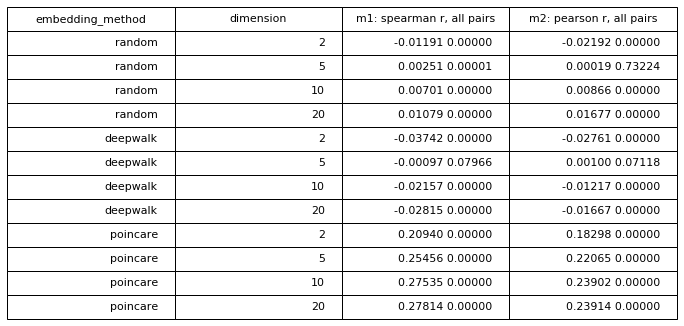

In [180]:
# Generate the table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplot
from matplotlib.table import table

#plt.figure(1, figsize=(20, 1))
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
the_table = ax.table(cellText=metrics_table, colLabels=metrics_header, loc='center')
the_table.set_fontsize(34)
the_table.scale(2, 2)
plt.show()

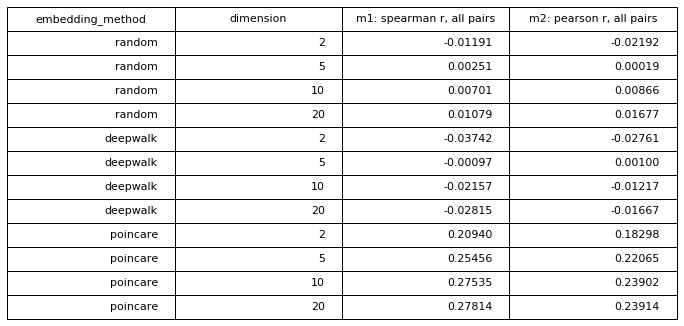

In [183]:
# 12: add metrics for deepwalk
# 11: generate metrics for random
from scipy.stats import spearmanr
from scipy.stats import pearsonr
metrics_table = []
metrics_header = ["embedding_method", "dimension", "m1: spearman r, all pairs", "m2: pearson r, all pairs"]
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    pearson =  pearsonr(phylogenetic_distance_all_node_pairs_list, random_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["random", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0]])

for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, deepwalk_embeddings_euclidean_distance_dict[d])
    metrics_table.append(["deepwalk", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0] ])

# 13: add metrics for poincare
for d in [2, 5, 10, 20]:
    spearman = spearmanr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    pearson = pearsonr(phylogenetic_distance_all_node_pairs_list, poincare_embeddings_poincare_distance_dict[d])
    metrics_table.append(["poincare", str(d), \
    '%.5f' % spearman[0] , \
    '%.5f' % pearson[0] ])

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplot
from matplotlib.table import table

#plt.figure(1, figsize=(20, 1))
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
the_table = ax.table(cellText=metrics_table, colLabels=metrics_header, loc='center')
the_table.set_fontsize(34)
the_table.scale(2, 2)
plt.show()